# QF 625 Introduction to Programming
## Group Assessment

***

> Good evening, Team.

> You are assigned to a group based on a random assignment code. By now, you are seeing your teammates in the Zoom breakout room to which you are assigned.

> Below are the two bigger sets of 10 questions. Wherever more than one process is needed to answer a question, I divided the question into smaller pieces. In this way I can give you a partial credit for completion of part of the question, if you cannot answer it fully.

> As you have previously seen in lessons, and as was emphasized in consultation for your group project, the questions are laid out in a logical progression in terms of making sense of given data. You will see that they read like detective stories. Your task is to figure out what is arising in the world by analyzing given data. Answering the questions will be fun.

> My intention, as discussed multiple times, is not just to give an assessment but also to give you further guidance towards understanding, and to experience how you might want to perform your data analysis, using computational programming in Python. Yes, all of this boils down to problem solving.

> Please make sure to submit your group work before the deadline: 9:30pm tonight, September 19, 2020. Please make sure to submit the assessment within the time allowed. It is open-book in nature, and is also a “timed task.” To be fair to all students, late submission will lead to point reduction. If you cannot fully answer all the questions, then do as much as you can. 

> Note that under a relative grading scheme, not everyone can receive an A grade for the course, due to school policy. If you find the questions easy, that does not guarantee your good final performance. If you find the questions a bit difficult, it is so that you may be given a valid and fair assessment. It does not mean that you are failing.

> Please note your group number for naming your submission file (e.g., GroupOO.ipynb)

> Wishing you the best for your group assignment, Team :)

***

### The first seven questions are about analyzing data regarding the names of babies in America. The US Social Security Administration (SSA) makes available data files, one per year, containing the total number of births for each sex/name combination from 1880 through the present. The archive of these files can be obtained from http://www.ssa.gov/oact/babynames/limits.html.

### After downloading the file `names.zip` and unzipping it, you will have a directory containing a series of files like yob1880.txt. Please put the unzipped folder `names` into `qf625` directory on your desktop. 

### Question 1. Since the dataset is split into files by year, one of the first things to do is to assemble all of the data into a single DataFrame and further to add a year field. Please create a DataFrame that contains all the files from 1880 to 2019. Note that the first three columns are `name`,  `sex`,  `births` in order.

In [1]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from datetime import datetime
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import requests
from bs4 import BeautifulSoup as bs
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import HoverTool

In [10]:
import pandas as pd
import os
  #要拼接的資料夾及其完整路徑，注意不要包含中文


In [167]:
years = range(1880, 2020)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = './names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)

### Question 2-1. With this data in hand, you can already start aggregating the data at the year and sex level using groupby or pivot_table. How would you create below?

In [168]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1989396,Zyheem,M,5,2019
1989397,Zykel,M,5,2019
1989398,Zyking,M,5,2019
1989399,Zyn,M,5,2019


In [169]:
births_by_year = names.pivot_table( index='year', columns='sex',values="births", aggfunc=sum)
births_by_year

sex,F,M
year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442
...,...,...
2015,1781725,1913059
2016,1767902,1893471
2017,1721550,1845472


<Figure size 1152x720 with 0 Axes>

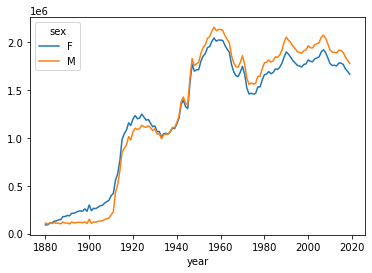

In [170]:
plt.figure(figsize=(16,10))
births_by_year.plot()

### Question 2-2. Next, let’s insert a column prop with the fraction of babies given each name relative to the total number of births. 

### A prop value of 0.02 would indicate that 2 out of every 100 babies were given a particular name. Thus, you should group the data by year and sex, then add the new column to each group as follows:

### Create your own function to calculate the column `prop` and then `apply` the function into `groupby`.

In [171]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1989396,Zyheem,M,5,2019
1989397,Zykel,M,5,2019
1989398,Zyking,M,5,2019
1989399,Zyn,M,5,2019


In [172]:
def get_i_need(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year','sex']).apply(get_i_need)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1989396,Zyheem,M,5,2019,0.000003
1989397,Zykel,M,5,2019,0.000003
1989398,Zyking,M,5,2019,0.000003
1989399,Zyn,M,5,2019,0.000003


> The resulting complete DataFrame now has the following columns:

### Question 2-3. As you have learned from the class, when performing a group operation like this, it’s often valuable to do a sanity check, like verifying that the prop column sums to 1 within all the groups:

In [173]:

names
three = names.groupby(["year", "sex"]).agg({"prop":"sum"})


In [174]:
three

prop
year sex      
1880 F     1.0
     M     1.0
1881 F     1.0
     M     1.0
1882 F     1.0
...        ...
2017 M     1.0
2018 F     1.0
     M     1.0
2019 F     1.0
     M     1.0

[280 rows x 1 columns]

### Question 3-1. Now that this is done, you are going to extract a subset of the data to facilitate further analysis: the top 1,000 names for each sex/year combination. This is yet another group operation.

### Please create your own function and `apply` the function.

In [176]:
def get_top1000(group):
    return group.sort_values(by = 'births',ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2019 M   1976350      Stone   M     209  2019  0.000117
         1976349      Seven   M     209  2019  0.000117
         1976348      Dhruv   M     209  2019  0.000117
         1976347      Aayan   M     209  2019  0.000117
         1976351       Rome   M     208  2019  0.000117

[279877 rows x 5 columns]

### Question 3-2. Then, please drop the group index that is NOT needed.

In [177]:
top1000.index = np.arange(len(top1000))

In [178]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
279872,Stone,M,209,2019,0.000117
279873,Seven,M,209,2019,0.000117
279874,Dhruv,M,209,2019,0.000117
279875,Aayan,M,209,2019,0.000117


### Question 3-3. Please replicate the output above, using `for loops`, `append`, and `concat`

In [ ]:

top1000_copy = pd.DataFrame(columns = ['name', 'sex','births','year','prop'])
for i in range(len(top1000)):
    line = top1000.iloc[i]
    top1000_copy = top1000_copy.append(line)
top1000_copy.reset_index(drop=True)


### Question 3-4. Then, cross-validate the two DataFrames.

> You will use this Top 1,000 dataset in the following investigations into the data.

### Question 4-1. With the full dataset and Top 1,000 dataset in hand, we can start analyzing various naming trends of interest. 

### Splitting the Top 1,000 names into the boy and girl portions is easy to do first.

In [179]:
boy = top1000[top1000.sex == 'M']
boy

,name,sex,births,year,prop
942,John,M,9655,1880,0.087383
943,William,M,9532,1880,0.086270
944,James,M,5927,1880,0.053643
945,Charles,M,5348,1880,0.048403
946,George,M,5126,1880,0.046393
...,...,...,...,...,...
279872,Stone,M,209,2019,0.000117
279873,Seven,M,209,2019,0.000117
279874,Dhruv,M,209,2019,0.000117
279875,Aayan,M,209,2019,0.000117


In [180]:
girl = top1000[top1000.sex == 'F']
girl

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
278872,Robin,F,258,2019,0.000155
278873,Luisa,F,257,2019,0.000154
278874,Zendaya,F,257,2019,0.000154
278875,Ariadne,F,256,2019,0.000154


### Question 4-2. Simple time series, like the number of Johns or Marys for each year, can be plotted but require a bit of munging to be more useful. 

### Please form a pivot table of the total number of births by year and name.

In [181]:
names_4_2 = top1000.pivot_table('births', index='year', columns='name',aggfunc=sum)
names_4_2

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Aayan,Ab,Abagail,...,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,297.0,NaN,4866.0,NaN,541.0,7164.0,211.0,NaN,NaN,NaN,...,6954.0,371.0,NaN,NaN,NaN,NaN,NaN,714.0,NaN,NaN
2016,NaN,284.0,4644.0,NaN,519.0,7164.0,NaN,NaN,NaN,NaN,...,6453.0,313.0,NaN,NaN,NaN,NaN,NaN,890.0,248.0,NaN
2017,241.0,291.0,4181.0,NaN,526.0,7205.0,NaN,NaN,NaN,NaN,...,6054.0,323.0,NaN,NaN,NaN,NaN,NaN,850.0,301.0,NaN


### Question 4-3. Now, this can be plotted for a handful of names with DataFrame’s plot method. How would you create a visualization of your data below?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2e8d96d60>,
      dtype=object)

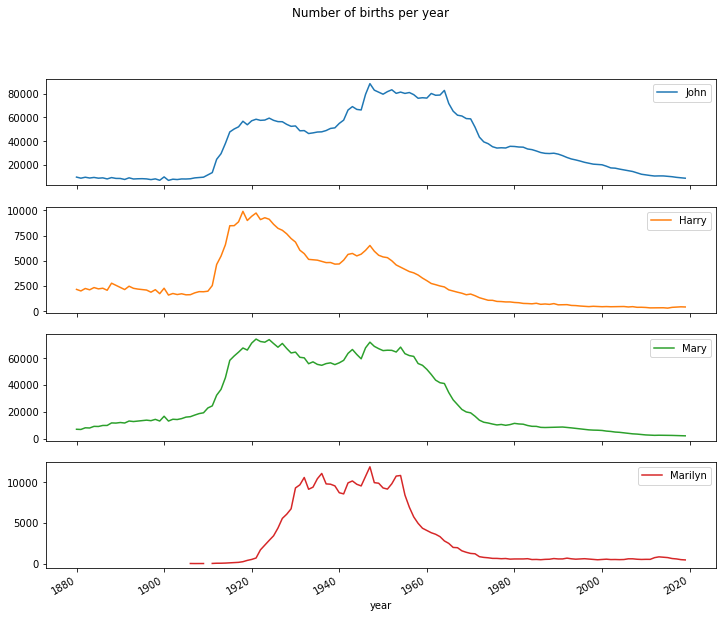

In [182]:
subset = names_4_2[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

> On looking at this, you might conclude that these names have grown out of favor with the American population. 

> Yet the underlying mechanism is actually more complicated than that, as will be examined in the next set of questions.

### Question 5-1. One explanation for the decrease in plots is that fewer parents are choosing common names for their children. 

### Such hypothesis can be explored and examined in the data. 

### One measure is the proportion of births represented by the top 1,000 most popular names, which you should aggregate and plot by year and sex as below.

### How would you create the plot below?

<Figure size 1080x720 with 0 Axes>

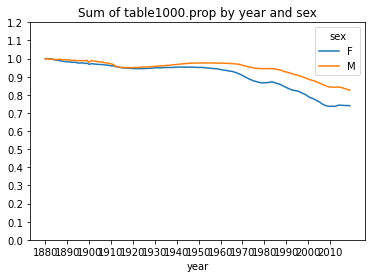

<Figure size 1080x720 with 0 Axes>

In [183]:
table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))
plt.figure(figsize=(15,10))

> You could see that there appears to be increasing name diversity (decreasing total proportion in the top 1,000). 

### Question 5-2 Another interesting metric is the number of distinct names, taken in order of popularity from highest to lowest, in the top 50% of births. 

### This number is a bit more tricky to compute. 

### Please consider just the boy names from 2010.

In [184]:
boy["year"]=boy["year"].astype(str)
boy=boy[boy.year=='2010']
boy

<ipython-input-184-2d925aab007c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boy["year"]=boy["year"].astype(str)


,name,sex,births,year,prop
260877,Jacob,M,22136,2010,0.011547
260878,Ethan,M,18004,2010,0.009392
260879,Michael,M,17359,2010,0.009055
260880,Jayden,M,17185,2010,0.008964
260881,William,M,17054,2010,0.008896
...,...,...,...,...,...
261872,Bailey,M,196,2010,0.000102
261873,Destin,M,196,2010,0.000102
261874,Eliezer,M,196,2010,0.000102
261875,Enoch,M,196,2010,0.000102


In [185]:
boy.dtypes

name       object
sex        object
births      int64
year       object
prop      float64
dtype: object

In [186]:
boy=boy[boy.year=='2010']
boy

,name,sex,births,year,prop
260877,Jacob,M,22136,2010,0.011547
260878,Ethan,M,18004,2010,0.009392
260879,Michael,M,17359,2010,0.009055
260880,Jayden,M,17185,2010,0.008964
260881,William,M,17054,2010,0.008896
...,...,...,...,...,...
261872,Bailey,M,196,2010,0.000102
261873,Destin,M,196,2010,0.000102
261874,Eliezer,M,196,2010,0.000102
261875,Enoch,M,196,2010,0.000102


### Question 5-3. After sorting prop in descending order, you want to know how many of the most popular names it takes to reach 50%. 

### You could write a for loop to do this, but a vectorized NumPy way is a bit more clever. 

### Taking the cumulative sum, cumsum, of prop and then calling the method searchsorted returns the position in the cumulative sum at which 0.5 would need to be inserted to keep it in sorted order.

In [193]:
names.sort_values(by="prop",ascending=False)
top50 = names[names["prop"]>=names["prop"].quantile(q=0.5)]


,name,sex,births,year,prop
942,John,M,9655,1880,0.087383
2938,John,M,8769,1881,0.087043
943,William,M,9532,1880,0.086270
7116,John,M,8894,1883,0.085008
2939,William,M,8524,1881,0.084611
...,...,...,...,...,...
549024,Neely,M,5,1957,0.000002
549025,Neldon,M,5,1957,0.000002
549026,Nesby,M,5,1957,0.000002
549027,Nevada,M,5,1957,0.000002


In [204]:
top1000_sorted = top1000.sort_values('prop')

In [206]:
top1000_sorted = top1000.sort_values('prop')
agg = 0
i  = 0
for prop in top1000_sort[:,'prop']:
    i = i + 1
    agg = agg + prop
    if agg > 0.5:
        break
return i

NameError: name 'top1000_sort' is not defined

### Question 5-4. ince arrays are zero-indexed, adding 1 to this result gives you a result of 117. By contrast, in 1900 this number was much smaller. Please do calculate the number.

25

### Question 5-5. You can now `apply` this operation to each year/sex combination, `groupby` those fields, and `apply` your own function returning the count for each group.

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
1885,40,16
1886,41,16
1887,41,17
1888,42,17


<AxesSubplot:title={'center':'The number of popular names in top 50%'}, xlabel='year'>

<Figure size 1080x720 with 0 Axes>

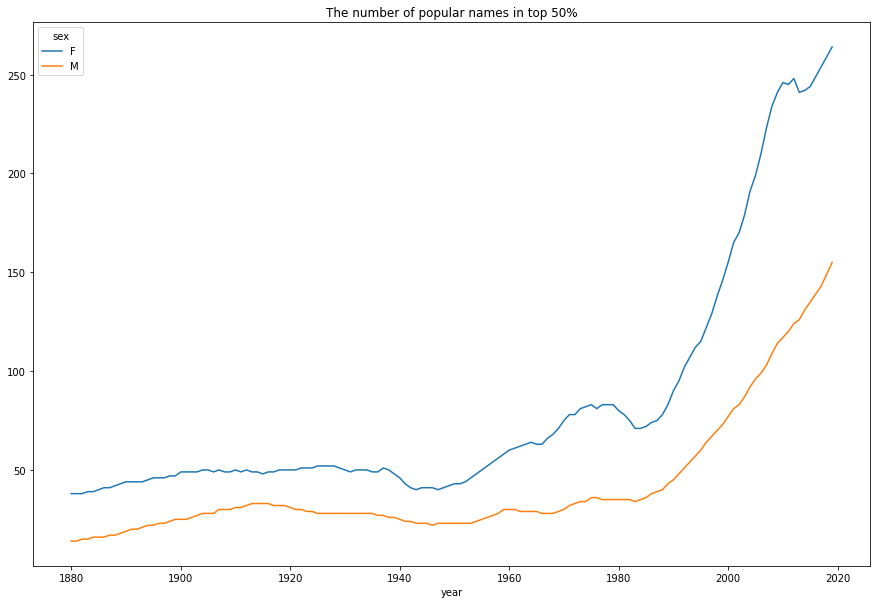

> In 2007, baby name scientist Laura Wattenberg pointed out on her [website](https://www.babynamewizard.com/) that the distribution of boy names by final letter has changed significantly over the last 100 years. 

### Question 6-1. To examine this, you should first aggregate all of the births in the full dataset by year, sex, and final letter. Please extract last letter from name column first.

0          y
1          a
2          a
3          h
4          e
5          t
6          a
7          e
8          a
9          h
          ..
1989391    n
1989392    h
1989393    e
1989394    t
1989395    e
1989396    m
1989397    l
1989398    g
1989399    n
1989400    n
Name: name, Length: 1989401, dtype: object

### Question 6-2. Then, create a pivot table below.

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2010      2011      2012   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   28881.0   27469.0   27220.0   
b                NaN      NaN      NaN  ...   39290.0   36687.0   34736.0   
c                NaN      NaN      NaN  ...   23356.0   23136.0   24287.0   
d             1027.0   1298.0   1374.0  ...   44843.0   43274.0   42501.0   
e            54353.0  66748.0  66662.0  ...  130296.0  128838.0  128552.0   
f                NaN      NaN      NaN  ...    2312.0    2302.0    2481.0   
g               25.0     44.0     28.0  ...    2697.0    2682.0    3805.0   
h             7141.0   8630.0   8825.0  ...   99340.0   98430.0   99095.0   
i              105.0    141.0    134.0  ...   43459.0   44570.0   47140.0   
j                NaN      NaN      NaN  ...    1479.0    1552.0    1499.0   
k               19.0     21.0     22.0  ...   35528.0   34265.0   34131.0   
l             6174.0   7900.0   8395.0  ...  135067.0  131919.0  129040.0   
m               90.0    123.0    137.0  ...   47361.0   50864.0   55095.0   
n             5512.0   6832.0   7103.0  ...  694761.0  690802.0  682522.0   
o               97.0    134.0    142.0  ...   81597.0   79400.0   78244.0   
p                NaN      NaN      NaN  ...    2432.0    2368.0    2526.0   
q                NaN      NaN      NaN  ...     345.0     357.0     337.0   
r              910.0   1207.0   1214.0  ...  167533.0  166239.0  167617.0   
s             2803.0   3581.0   3569.0  ...  124912.0  121487.0  122039.0   
t             3140.0   3816.0   3784.0  ...

### Question 6-3. Then please select out three representative years spanning the history and print the first few rows.

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691274.0  677049.0    977.0    5214.0   28881.0
b                 NaN     694.0     455.0    411.0    3912.0   39290.0
c                 5.0      49.0     957.0    482.0   15457.0   23356.0
d              6751.0    3731.0    2644.0  22113.0  262117.0   44843.0
e            133601.0  435027.0  316855.0  28665.0  178764.0  130296.0

### Question 6-4. Next, normalize (standardize) the table by total births to compute a new table containing proportion of total births for each sex ending in each letter.

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273386  0.341874  0.381252  0.005031  0.002445  0.015066
b                 NaN  0.000343  0.000256  0.002116  0.001835  0.020495
c            0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d            0.017026  0.001845  0.001489  0.113861  0.122937  0.023392
e            0.336947  0.215145  0.178424  0.147598  0.083843  0.067968
f                 NaN  0.000010  0.000055  0.000783  0.004329  0.001206
g            0.000144  0.000157  0.000377  0.002260  0.009488  0.001407
h            0.051530  0.036221  0.075985  0.045564  0.037913  0.051820
i            0.001526  0.039967  0.031697  0.000844  0.000610  0.022670
j                 NaN       NaN  0.000093       NaN       NaN  0.000772
k            0.000121  0.000155  0.000355  0.036579  0.049376  0.018533
l            0.043187  0.033867  0.026390  0.065022  0.104890  0.070457
m            0.001200  0.008613  0.002599  0.058045  0.033834  0.024705
n            0.079237  0.130672  0.140056  0.143386  0.152525  0.362416
o            0.001672  0.002439  0.001247  0.017064  0.012844  0.042564
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013395  0.006765  0.018046  0.064471  0.031043  0.087392
s            0.039036  0.012764  0.013337  0.130797  0.102701  0.065159
t            0.027432  0.015198  0.007838  0.072885  0.065645  0.022861
u            0.000683  0.000575  0.000416  0.000124  0.000057  0.001228
v                 NaN  0.000060  0.000117  0.000113  0.000036  0.001449
w            0.000020  0.000031  0.001190  0.006323  0.007708  0.016184
x            0.000015  0.000037  0.000729  0.003965  0.001851  0.008599
y            0.110975  0.152556  0.116762  0.077344  0.160983  0.058196
z            0.002436  0.000658  0.000700  0.000170  0.000184  0.001829

### Question 6-5. With the letter proportions now in hand, please make bar plots for each sex broken down by year.

<AxesSubplot:title={'center':'Male'}, xlabel='last_letter'>

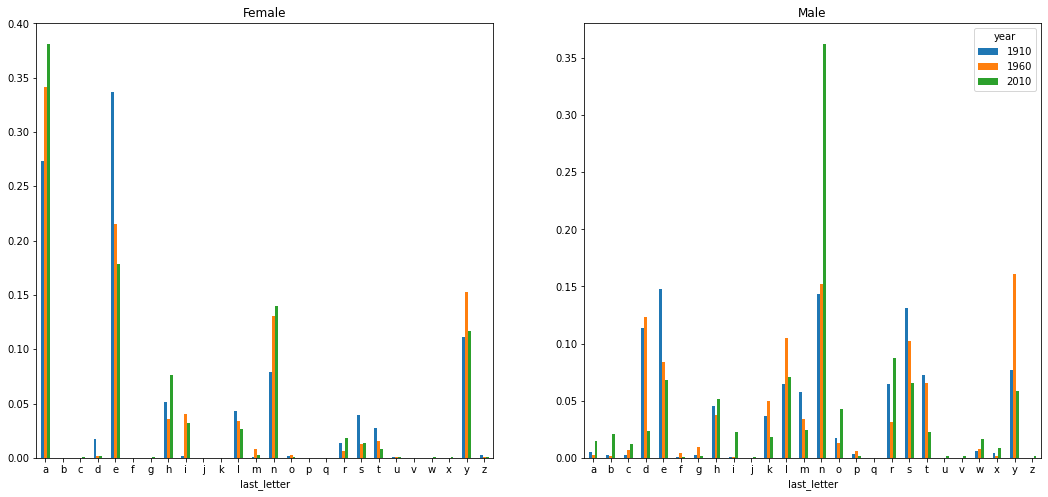

### Question 7-1. With this DataFrame of time series in hand, you can make a plot of the trends over time again with its plot method (Note that gender here is `Male`)

last_letter,s,n,y
year,,,
1880,0.167011,0.153217,0.075763
1881,0.162483,0.153212,0.077455
1882,0.160433,0.149561,0.077538
1883,0.158108,0.151656,0.079149
1884,0.154751,0.149927,0.080408


<AxesSubplot:xlabel='year'>

<Figure size 1080x720 with 0 Axes>

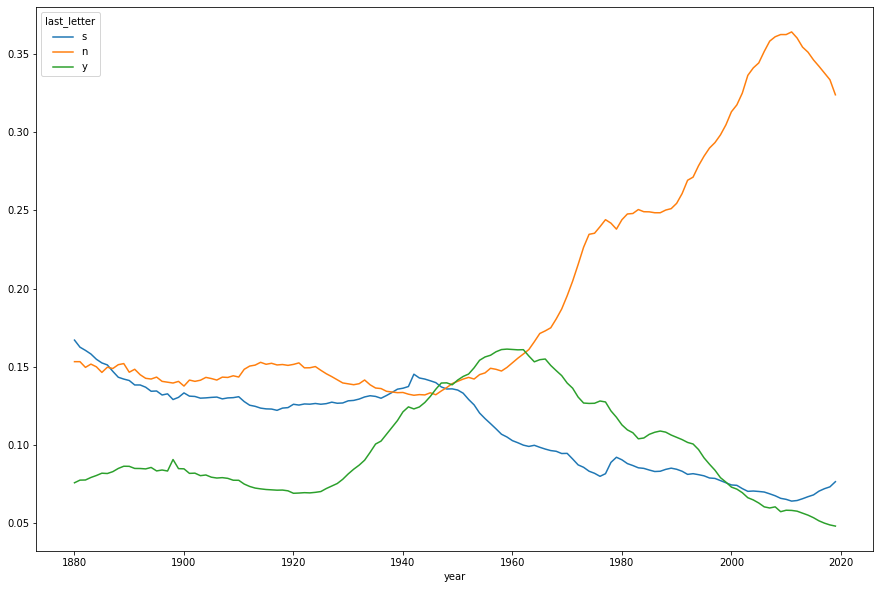

### Question 7-1. Another interesting trend is looking at boy names that were more popular with one sex earlier in the sample but have “changed sexes” in the present. 

### One example is the name Lesley or Leslie. 

### Going back to the `top1000` DataFrame, please compute a list of names occurring in the dataset starting with `lesl`.

632     Leslie
2294    Lesley
4264    Leslee
4732     Lesli
6107     Lesly
dtype: object

### Question 7-2. From there, you can filter down to just those names and sum births grouped by name to see the relative frequencies.

name
Leslee       993
Lesley     35036
Lesli        929
Leslie    378749
Lesly      11433
Name: births, dtype: int64

### Question 7-3. Next, please aggregate by sex and year and normalize within year:

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


### Question 7-4. It is now possible to make a plot of the breakdown by sex over time.

<AxesSubplot:xlabel='year'>

<Figure size 1080x720 with 0 Axes>

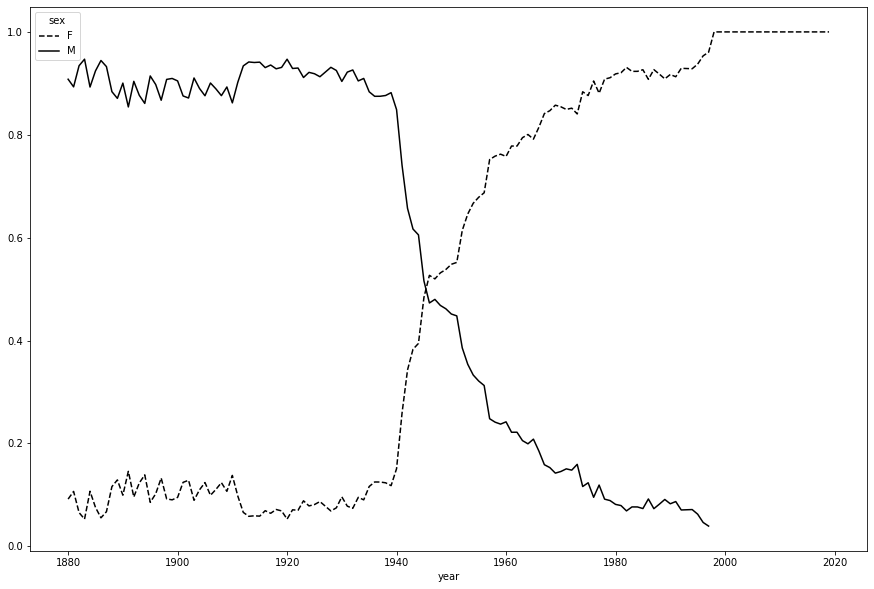

### ***Now let's analyze some data about natural phenomena for the next three questions.***

### The data in `q8910.data` has the following format:

```
61  1  1 15.04 14.96 13.17  9.29 13.96  9.87 13.67 10.25 10.83 12.58 18.50 15.04
61  1  2 14.71 16.88 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25  8.04  8.50  7.67 12.75 12.71
```

### The first three columns are year, month and day.  

### The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day. 

### You should be able to solve questions below without using a for loop or other looping construct.

### Start by using the `loadtxt` function from numpy to read the data into an array. 

### from numpy import (loadtxt, arange, searchsorted, add, zeros, unravel_index, where)

In [37]:
import numpy as np

wind_data = np.loadtxt('q8910.data')

data = wind_data[:, 3:]
data

array([[15.04, 14.96, 13.17, ..., 12.58, 18.5 , 15.04],
       [14.71, 16.88, 10.83, ...,  9.67, 17.54, 13.83],
       [18.5 , 16.88, 12.33, ...,  7.67, 12.75, 12.71],
       ...,
       [14.  , 10.29, 14.42, ..., 16.42, 18.88, 29.58],
       [18.5 , 14.04, 21.29, ..., 12.12, 14.67, 28.79],
       [20.33, 17.41, 27.29, ..., 11.38, 12.08, 22.08]])

### Question 8-1. Calculate the min, max and mean windspeeds and standard deviation of the windspeeds over all the locations and all the times (A single set of numbers for the entire dataset).

### Question 8-2. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days (a different set of numbers for each location).

### Question 9-1. Calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day (a different set of numbers for each day)

### Question 9-2. Find the location which has the greatest windspeed on each day (an integer column number for each day).

### Question 10-1.  Find the year, month and day on which the greatest windspeed was recorded.

### Question 10-2.  Find the average windspeed in January for each location.

> `Thank you for working with the script :)`

In [ ]:
exit()